In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [7]:
dvfs_list = ['0c00', '0d00', '0e00', 
             '0f00', '1000', '1100', '1200', 
             '1300', '1400', '1500', '1600', '1700', '1800', '1900', '1a00']
itr_list = [2, 100, 300, 500, 700]

dvfs_dict = {
    "0x0c00" :  1.2,
    "0x0d00" :  1.3,
    "0x0e00" :  1.4,
    "0x0f00" :  1.5,
    "0x1000" : 1.6,
    "0x1100" : 1.7,
    "0x1200" : 1.8,
    "0x1300" : 1.9,
    "0x1400" : 2.0,
    "0x1500" : 2.1,
    "0x1600" : 2.2,
    "0x1700" : 2.3,
    "0x1800" : 2.4,
    "0x1900" : 2.5,
    "0x1a00" : 2.6,
    "0x1b00" : 2.7,
    "0x1c00" : 2.8,
    "0x1d00" : 2.9,
}

df_dict = {
    'itr': [],
    'dvfs': [],
    'rate': [],
    'watts_avg': [],
    'watts_std': []
}


file=f"/home/han/github/logs/cores16_frate200000_600000_fbuff-1_itr1_dvfs1_rapl1_repeat0/summary.csv"
df = pd.read_csv(file)
dff = df[df['name'].str.contains('Sink')]
dff.columns = 'Sink' + dff.columns
cols = dff.columns
for col in cols[2:]:
    df_dict[col] = []

dff = df[df['name'].str.contains('Source')]
dff.columns = 'Source' + dff.columns
cols = dff.columns
for col in cols[2:]:
    df_dict[col] = []

dff = df[df['name'].str.contains('Mapper')]
dff.columns = 'Mapper' + dff.columns
cols = dff.columns
for col in cols[2:]:
    df_dict[col] = []
print(df_dict.keys())

dict_keys(['itr', 'dvfs', 'rate', 'watts_avg', 'watts_std', 'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std', 'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std', 'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std', 'SinkbackPressuredTimeMsPerSecond_avg', 'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%', 'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg', 'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg', 'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg', 'SourcebusyTimeMsPerSecond_std', 'SourcebackPressuredTimeMsPerSecond_avg', 'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%', 'SourcebackPressuredTime_%', 'MappernumRecordsInPerSecond_avg', 'MappernumRecordsInPerSecond_std', 'MappernumRecordsOutPerSecond_avg', 'MappernumRecordsOutPerSecond_std', 'MapperbusyTimeMsPerSecond_avg', 'MapperbusyTimeMsPerSecond_std', 'MapperbackPressuredTimeMsPerSecond_avg', 'MapperbackPressuredTimeMsPe

In [8]:
for itr in itr_list:
    for dvfs in dvfs_list:
        file=f"/home/han/github/logs/cores16_frate200000_600000_fbuff-1_itr{itr}_dvfs{dvfs}_rapl1_repeat0/summary.csv"
        df_dict['itr'].append(itr)
        if '0x'+dvfs in dvfs_dict:
            df_dict['dvfs'].append(dvfs_dict['0x'+dvfs])
        else:
            df_dict['dvfs'].append(dvfs)
            
        df_dict['rate'].append(200000)
        
        df = pd.read_csv(file)
        
        dff = df[df['name'].str.contains('Sink')]
        dff.columns = 'Sink' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col].append(dff.mean(numeric_only=True)[col])

        dff = df[df['name'].str.contains('Source')]
        dff.columns = 'Source' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col].append(dff.mean(numeric_only=True)[col])

        dff = df[df['name'].str.contains('Mapper')]
        dff.columns = 'Mapper' + dff.columns
        cols = dff.columns
        for col in cols[2:]:
            df_dict[col].append(dff.mean(numeric_only=True)[col])
            
        jfile = f"/home/han/github/logs/cores16_frate200000_600000_fbuff-1_itr{itr}_dvfs{dvfs}_rapl1_repeat0/server2_rapl.log"
        with open(jfile) as file:
            lines = [float(line.rstrip()) for line in file]
            print(len(lines))
            df_dict['watts_avg'].append(float(round(np.mean(lines[300:500]), 2)))
            df_dict['watts_std'].append(float(round(np.std(lines[300:500]), 2)))
            #print(np.std(lines[300:500]))
print(df_dict)

688
688
683
686
685
684
686
688
685
683
685
685
680
684
688
684
686
687
686
684
688
684
684
685
687
686
680
687
685
680
685
682
689
686
683
689
686
686
687
684
683
685
683
689
683
684
684
686
685
684
687
685
691
681
685
686
682
685
685
683
689
691
684
690
687
685
683
688
686
688
682
684
690
680
687
{'itr': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700, 700], 'dvfs': [1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1

In [26]:
d = pd.DataFrame(df_dict)
d = d.astype(np.float32)
d.to_csv('query1_2.csv')
print(d.columns)

Index(['itr', 'dvfs', 'rate', 'watts_avg', 'watts_std',
       'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std',
       'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std',
       'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std',
       'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'MappernumRecordsInPerSecond_avg',
       'MappernumRecordsInPerSecond_std', 'MappernumRecordsOutPerSecond_avg',
       'MappernumRecordsOutPerSecond_std', 'MapperbusyTimeMsPerSecond_avg',
       'M

In [56]:
def doPlot1(d, x, y, xlab, ylab, etitle="", blim=False, llab=""):
    err = y.replace('avg', 'std')
    
    plt.errorbar(d[x], d[y], yerr=d[err], fmt="o-", label=f"Static{llab}")
    plt.ylabel(ylab, fontsize=16)
    plt.xlabel(xlab, fontsize=16)
    plt.legend()
    #plt.legend(loc='lower right')
    if blim:
        plt.ylim(bottom=0, top=100)
    if etitle:
        plt.title(f"Flink - Query1 - 16 Mappers - 200K rate - {etitle}")
    plt.tight_layout()

    dvfs  watts_avg  watts_std
0    1.2  64.059998       0.29
1    1.3  63.099998       0.62
2    1.4  63.000000       0.78
3    1.5  63.730000       1.14
4    1.6  63.439999       0.96
5    1.7  66.879997       1.06
6    1.8  64.320000       0.80
7    1.9  70.209999       1.01
8    2.0  70.459999       0.78
9    2.1  74.849998       1.05
10   2.2  69.540001       0.98
11   2.3  70.589996       1.00
12   2.4  72.339996       1.20
13   2.5  74.010002       1.00
14   2.6  75.820000       0.89
    dvfs  watts_avg  watts_std
15   1.2  62.270000       0.55
16   1.3  63.580002       0.84
17   1.4  62.450001       0.80
18   1.5  67.029999       0.84
19   1.6  62.270000       0.91
20   1.7  69.419998       0.80
21   1.8  66.070000       0.82
22   1.9  65.370003       0.96
23   2.0  68.410004       1.00
24   2.1  71.589996       1.00
25   2.2  77.010002       1.27
26   2.3  69.570000       1.22
27   2.4  71.330002       1.26
28   2.5  74.879997       1.16
29   2.6  84.930000       1.24
    dvfs

/tmp/ipykernel_14259/3523730202.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_14259/3523730202.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_14259/3523730202.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_14259/3523730202.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


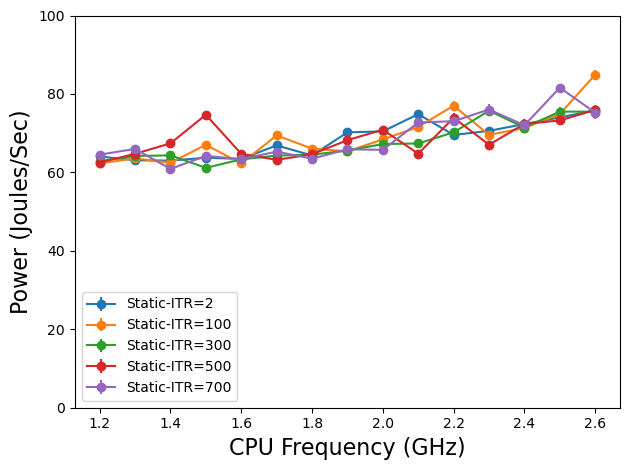

In [57]:
for i in d['itr'].unique():
    #print(i)
    dff = d[d['itr'] == i]
    print(dff[['dvfs', 'watts_avg', 'watts_std']])
    doPlot1(dff, 'dvfs', 'watts_avg', "CPU Frequency (GHz)", 
            "Power (Joules/Sec)", llab=f"-ITR={int(i)}", blim=True)
#print(d.groupby(['dvfs'])['itr'])
#print(dff[['itr', 'watts_avg']])
#doPlot1(dff, 'dvfs', 'watts_avg', "CPU Frequency (GHz)", 
#        "Power (Joules/Sec)", etitle="Average Power Consumption")

/tmp/ipykernel_14259/3523730202.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


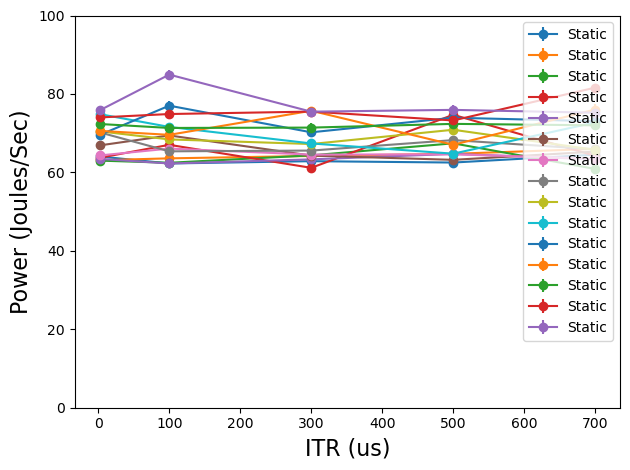

In [58]:
for i in d['dvfs'].unique():
    dff = d[d['dvfs'] == i]
    doPlot1(dff, 'itr', 'watts_avg', "ITR (us)", 
            "Power (Joules/Sec)", blim=True)